<a href="https://colab.research.google.com/github/JuanCReyes1/GeospatialDataAnalysis/blob/main/KrigingApp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Synthetic Two-Dimensional Geospatial Point Surfaces Generated in GeoPandas

## Written by: Juan C. Reyes 

## GDAA 2040 - Spatial Analysis and Geostatistics, Centre of Geographic Sciences, NSCC.

# Instructor: Dr. Steven Edwards

Please make sure to pip install geopandas and importing the libraries below before running the main script.

The purpose of this code is to generate 2-D point Surfaces using numpy and assign a geospatial context using GeoPandas. A shapefile is output every time the program finishes which can be opened in ArcGIS Pro or ArcMap. At the end of the program execution, the user is prompted for a name of the .shp file and ask if the program needs to be run again.  



*   The program is programmed to generate "Default" graphs if the user simply presses "Enter" at each prompt. Feel free to play around with different parameter values.




In [2]:
pip install geopandas

     |████████████████████████████████| 1.0 MB 5.1 MB/s 
     |████████████████████████████████| 6.3 MB 35.0 MB/s 
     |████████████████████████████████| 16.7 MB 350 kB/s 


In [3]:
import pandas as pd
import geopandas
import matplotlib.pyplot as plt
import numpy as np

*Useful constants*

**COGS: (LONG,LAT) = (-65.168,44.8850)**

**Circumference of the Earth ~ 40074km**

**EPSG Geodetic Parameter for WGS84 = 4326**

1$°$latitude = 110.574 km across the globe.

1$°$longitude = 111.320 ⋅ cos(latitude) km (longitude is dependent on latitude)



In [4]:
######Generating 2 dimensional point surface shapefiles with geopandas#####  
#You can run this on google colab
#https://colab.research.google.com/drive/10mrdxW8CBjCJ1blP4ALTwgruy5UntomT?usp=sharing
#Also on GitHub: https://github.com/JuanCReyes1/GeospatialDataAnalysis/blob/main/KrigingApp.ipynb

#### We will generate a rectangular region centred about a geographical location using the
#### EPSG Geodetic Parameter Code '4326' for the World Geodetic System Datum WGS84.
#  

## This version could only work with Python 3.1 
## Import necessary libraries
import pandas as pd
import geopandas
import numpy as np

##Geographical Considerations

## The latitude and longitude for The Centre of Geographic Sciences, Lawrencetown Village, Nova Scotia, Canada.
## This is the mathematical origin of the surface
datum = "EPSG:4326"
cogs_long = -65.16843
cogs_lat = 44.885073
earth_circumference = 40074 #km

###Calculate a kilometer of distance horizontally and vertically based on this location.
###We need to convert our latitude to radians since latitude
### is dependent on geographic latitude.
cogs_lat_radians = cogs_lat * (np.pi/180) #conversion of degrees to radians
#longitude kilometer conversion: 1deg = 111.320*cos(latitude) km
long_km = 360 / (earth_circumference * np.cos(cogs_lat_radians)) 
#long_km = 360 / (earth_circumference * np.cos(cogs_lat)) 
# latitude kilometer conversion: 1deg = 110.574 km (Equal across the globe)
lat_km = 1/110.574 
n=1 # n is the number of points per dimension, initializing with 1.

###################Spatial Functions###################
""" 
 A few functions we will use for COGS (2040): Geospatial Statistics.
 We will use these functions to generate synthetic test data to 
 test a wide variety of geostatistical functions and algorithms in ArcGIS Pro. 

"""

#Constant function of '1s' at every spatial location. Homogeneous.
def ones_2d(size=n):
    return np.ones((n,n))

# Random normally distributed values, can set the mean and standard deviation. Can be scaled with the parameter A.
def normal_dist_2d(mean=0,sd=1,size=n,A=1):
    return A*np.random.normal(mean,sd, size =(n,n))

# https://en.wikipedia.org/wiki/Gaussian_function#Two-dimensional_Gaussian_function  
# This 2D gaussian function is centered about COGS.
# There are independent values for means and std devs in both the x and y axes.
# I had to play with the means (mx,my), standard deviations(sx,sy) to get them to look 'nice' on the graph.
# Feel free to tweak these parameters to adjust the shape of the distribution
# Added the shift parameter to further shift the bell shape along x, or y. This is useful for adding gaussians together.
def gaus2d(x=0, y=0, mx=cogs_long, my=cogs_lat, sx=0.009, sy=0.009,shift_x=0.01,shift_y=0.00):
    # Different amplitude parameters, wikipedia uses A=1, however the chosen amplitude is usually selected
      # for gaussian normalization (integral = 1)

    #A=1  
    A = 1. / (2 * np.pi*sx * sy)
    #A1 = 1/ (np.sqrt(2*np.pi * sx**2 *sy**2))

    return A * np.exp(-((x - mx - shift_x)**2. / (2. * sx**2.) + (y - my - shift_y)**2. / (2. * sy**2.)))


# Trig function that I thought was cool... highly nonlinear so don't expect any methods to work..
def cool_trig_function(A=1,f=0.481,w=2.05,inner_pow = 4, outer_pow=2,cogs_long=cogs_long, cogs_lat=cogs_lat):

    return A*(np.sin( f*(yy-w*cogs_long)**inner_pow + f*(xx-w*cogs_lat)**inner_pow ) )**outer_pow/ np.sqrt(xx**2 + yy**2)
    #z1 = 1*(np.sin( 0.481*(yy-2.05*cogs_long)**4 + 0.481*(xx-2.05*cogs_lat)**4 ) )**2/np.sqrt(xx**2 + yy**2)

again = "Y"
while again[0].upper() != "N":


    ###We will create a regular rectangular grid where we can plot various spatial functions.

    ### The exercise is to use these functions as a baseline for our statistical methods to extrapolate.

    #Number of points to calculate for each dimension in our grid (total points is n**2)
    n = int(input("How many points do you want per axes? Suggestion: 60\n") or "60")
    shift=int(input("How many km's away from cogs do you want to sample? Suggestion: 2\n") or "2")

    x = np.linspace(cogs_lat - shift*lat_km, cogs_lat + shift*lat_km,n, endpoint=True)
    y = np.linspace(cogs_long - shift*long_km,cogs_long + shift*long_km,n, endpoint=True)
    
    xx , yy = np.meshgrid(x,y,indexing='ij')

    print("Which spatial function do you want to convert to a .shp file?")
    print("\n\t 1. 2D Constant Surface")
    print("\n\t 2. 2D Random Normal Distribution")
    print("\n\t 3. 2D Gaussian")
    print("\n\t 4. Two-2D Gaussians ")
    print("\n\t 5. 2D Trigonometric (Very Nonlinear) \n ")

    choice = 0
    while choice == 0:
      
        try:

            choice = input("Please select a number from 1-4 indicating your choice: \n")

            if choice.isnumeric() == False:
                print("You selected a non-numeric answer,please enter a valid number in the given range. \n ")
                
                choice = 0

            choice = int(choice)

            if choice == 1:
                print("You selected the 2D Constant Surface.")

                z = ones_2d(n)
                

            elif choice == 2:
                print("You selected the 2D Random Normal Distribution.")
                print("Leave a blank if you prefer the default value.")
                mean = float(input("Select the mean of the distribution. Default is 0. \n") or "0")
                sd = float(input("Select the standard deviation of the distribution. Default is 1. \n") or "1")
                A = float(input("Select a scaling for the distribution. Default is 1. \n") or "1")

                z= normal_dist_2d(mean,sd,size=n,A=A)
                

            elif choice == 3:
                print("You selected the 2D Gaussian Distribution.")
                print("Leave a blank if you prefer the default value.")
                print("This gaussian is centered about the COGS latitude and longitude. \n")
                
                sx = float(input("Please enter the horizontal standard deviation. Default is 0.009. \n") or "0.009")
                sy = float(input("Please enter the vertical standard deviation. Default is 0.009. \n") or "0.009")
                shift_x = float(input("Please enter the horizontal shift of the gaussian away from COGS. Default is 0.00.")  or "0.00")
                shift_y = float(input("Please enter the vertical shift of the gaussian away from COGS. Default is 0.00.")  or "0.00")

                z = gaus2d(x=yy,y=xx,mx=cogs_long, my=cogs_lat,sx=sx,sy=sy,shift_x=shift_x,shift_y=shift_y)

            elif choice == 4:
                print("You selected the Two - 2D Gaussian Distribution.")
                print("Leave a blank if you prefer the default values.")
                print("Two gaussians are generated East and West of COGS. \n")
                print("\t Please enter the following values for the Westward Gaussian. \n")
                
                sx = float(input("Please enter the horizontal standard deviation. Default is 0.009. \n") or "0.009")
                sy = float(input("Please enter the vertical standard deviation. Default is 0.009. \n") or "0.009")
                shift_x = float(input("Please enter the horizontal shift of the gaussian away from COGS. Default is -0.01.\n")  or "-0.01")
                shift_y = float(input("Please enter the vertical shift of the gaussian away from COGS. Default is -0.01. \n")  or "-0.01")

                #Westward Gaussian (x-shifted and y-shifted)
                z1 = gaus2d(x=yy,y=xx,mx=cogs_long, my=cogs_lat,sx=sx,sy=sy,shift_x=shift_x,shift_y=shift_y)

                print("\t\t Please enter the following values for the Eastward Gaussian. \n")
                sx = float(input("Please enter the horizontal standard deviation. Default is 0.009. \n") or "0.009")
                sy = float(input("Please enter the vertical standard deviation. Default is 0.009. \n") or "0.009")
                shift_x = float(input("Please enter the horizontal shift of the gaussian away from COGS. Default is 0.01.\n")  or "0.01")
                shift_y = float(input("Please enter the vertical shift of the gaussian away from COGS. Default is 0.01. \n")  or "0.01")

                #Eastward Gaussian (x-shifted and y-shifted)
                z2 = gaus2d(x=yy,y=xx,mx=cogs_long, my=cogs_lat,sx=sx,sy=sy,shift_x=shift_x,shift_y=shift_y)

                # Both distributions are simply added together.
                z = z1 + z2
                

            elif choice == 5:
                print("You selected the Trigonometric Function.")
                print("You selected the 2D Trigonometric Distribution.")
                print("Leave a blank if you prefer the default value.")
                print("This trig function is centered about COGS latitude and longitude. \n")
                A = float(input("Select a scaling for the distribution. Default is 1. \n") or "1")
                f = float(input("Select a frequency for the function. Default is 0.481. \n") or "0.481")
                w = float(input("Select an angular velocity for the function. Default is 2.05. \n") or "2.05")
                outer_pow = float(input("Select an outer exponential power for the trig function. Default is 2. \n") or "2")
                inner_pow = float(input("Select an inner exponential power for the trif function. Default is 4. \n") or "4")

                z = cool_trig_function(A=A,f=f,w=w,inner_pow = inner_pow, outer_pow=outer_pow,cogs_long=cogs_long, cogs_lat=cogs_lat)
                

            else:
                raise ValueError()
                

        except ValueError:
            print("You selected a number that is outside of the allowed range, try again. \n")
            choice = 0

    #Create a data frame with our x,y, and target variables
    df = pd.DataFrame(z,index = x, columns=y)
    #Create a temporary data frame that unstacks the results and renames columns
    newdf = df.unstack().reset_index().rename(columns={'level_0':'longitude','level_1':'lat',0:'target_variable'})
    
    print("What sample of the data do you want to retain?")
    portion = float(input("Enter a fractional number between 0-1. Default is 1 (entire data set). \n") or "1.0" )
    newdf=newdf.sample(frac=portion)
    
    #Create a geopandas geodataframe to begin transition to .shp file. Assign Point Data.
    gdf = geopandas.GeoDataFrame(newdf, geometry=geopandas.points_from_xy(newdf.longitude, newdf.lat))
    #Define a Geodetic Parameter. EPSG 4326 refers to WGS84 geodetic datum.
    gdf.crs = datum

    filename = input("Enter a name for the shapefile: \t\n")

    gdf.to_file(driver = 'ESRI Shapefile', filename= filename + ".shp") 

      
    again = input("Run the algorithm again?\n ")     
    if len(again) == 0:
        again = "Y"

print(" ---- Good Bye"*4, "----")

####If you are interested in plotting these functions on python the following function 
## Is useful to plot with matplotlib

#import matplotlib.pyplot as plt
#plt.contourf(xx, yy, z, cmap = 'jet')

How many points do you want per axes? Suggestion: 60
60
How many km's away from cogs do you want to sample? Suggestion: 2
8
Which spatial function do you want to convert to a .shp file?

	 1. 2D Constant Surface

	 2. 2D Random Normal Distribution

	 3. 2D Gaussian

	 4. Two-2D Gaussians 

	 5. 2D Trigonometric (Very Nonlinear) 
 
Please select a number from 1-4 indicating your choice: 
5
You selected the Trigonometric Function.
You selected the 2D Trigonometric Distribution.
Leave a blank if you prefer the default value.
This trig function is centered about COGS latitude and longitude. 

Select a scaling for the distribution. Default is 1. 

Select a frequency for the function. Default is 0.481. 

Select an angular velocity for the function. Default is 2.05. 

Select an outer exponential power for the trig function. Default is 2. 

Select an inner exponential power for the trif function. Default is 4. 

What sample of the data do you want to retain?
Enter a fractional number between 0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:206: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.


Run the algorithm again?
 no
 ---- Good Bye ---- Good Bye ---- Good Bye ---- Good Bye ----


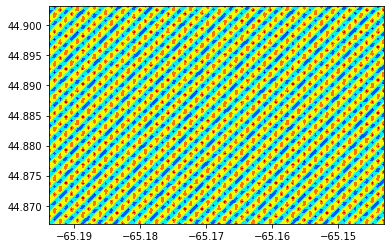

In [ ]:
plt.contourf(yy, xx, z, cmap = 'jet')